# Linear regression using gradient descent

In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from glob import glob

from sklearn import * 

%matplotlib inline

Load and normalize data

In [35]:
dataset = pd.read_csv("/data/Combined_Cycle_Power_Plant.csv")

dataset.info()
X_data = dataset.iloc[:, :-1].values
X_data = preprocessing.StandardScaler().fit_transform(X_data)
y_data = dataset.iloc[:, -1].values
print(X_data.shape, y_data.shape)

n_x = X_data.shape[1]
print("Feature length of X: ", n_x)

X_train, X_test, y_train, y_test = model_selection.train_test_split(X_data, y_data, 
                                                test_size = 0.3, random_state = 1) 

lr = linear_model.SGDRegressor()
lr.fit(X_train, y_train)
print("\ninterccept:", lr.intercept_, 
      "\ncoeff", lr.coef_, 
      "\nmse: ", metrics.mean_squared_error(y_test, lr.predict(X_test)))


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47840 entries, 0 to 47839
Data columns (total 5 columns):
AT    47840 non-null float64
V     47840 non-null float64
AP    47840 non-null float64
RH    47840 non-null float64
EP    47840 non-null float64
dtypes: float64(5)
memory usage: 1.8 MB
(47840, 4) (47840,)
Feature length of X:  4

interccept: [454.376185] 
coeff [-14.8139242   -3.07513618   0.42145951  -2.24793328] 
mse:  20.920220569277426


y_pred Tensor("add:0", shape=(?, 1), dtype=float32)
b''
0 206804.22
10 2407.0554
20 52.447304
30 23.858925
40 22.582674
50 21.945318
60 21.528316
70 21.253975
80 21.073467
90 20.954702
99 20.882988
Intercept and coeff:
 [454.37277, array([[-13.7944145],
       [ -3.6539044],
       [  0.5553799],
       [ -2.0000532]], dtype=float32)]


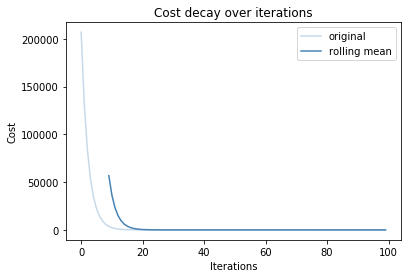

In [39]:
max_iters = 100

tf.reset_default_graph()

X = tf.placeholder(tf.float32, shape=[None, n_x], name="X")
y = tf.placeholder(tf.float32, shape=[None, 1], name = "y")

W = tf.Variable(tf.truncated_normal([n_x, 1], stddev=0.1, seed = 1), name = "W")
b = tf.Variable(0.0, dtype=tf.float32, name="b")
y_pred = tf.matmul(X, W) + b
print("y_pred", y_pred)

mse = tf.reduce_mean(tf.square(y - y_pred))

tf.summary.scalar("cost", mse)
tf.summary.tensor_summary("W", W)

optimizer = tf.train.GradientDescentOptimizer(learning_rate = 0.1).minimize(mse)

summary = tf.summary.merge_all()


with tf.Session() as session:
    print(session.sess_str)
    scores = {}
    tf.global_variables_initializer().run()
    writer = tf.summary.FileWriter("/tmp/tf/logs/1", session.graph)
    
    epochs, costs = 200, []
    for i in range(max_iters):
        _, mse_,summary_ = session.run([optimizer, mse, summary]
                                       , feed_dict = {X: X_train, y: y_train.reshape(-1, 1)})
        scores[i] = mse_
        writer.add_summary(summary_, i)
        if i % (max_iters // 10) == 0 or i == max_iters - 1:
            print(i, mse_)
    print("Intercept and coeff:\n", session.run([b, W]))

    plot_scores(scores)
    writer.close()
    

# Launch tensorboard

Run the following command
```
$ tensorboard --logdir=/tmp/tf/logs/1
```

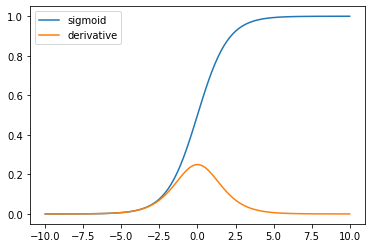

In [29]:
w = tf.Variable(tf.linspace(-10.0, 10.0, 100))
z = tf.sigmoid(w)
dz = tf.gradients(z, [w])[0]

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    w_, z_, dz_ = sess.run([w, z, dz])
    plt.plot(w_, z_, label = "sigmoid")
    plt.plot(w_, dz_, label = "derivative")
    plt.legend()

In [40]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

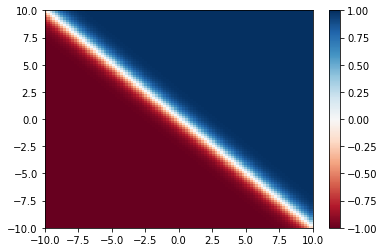

In [41]:
w1 = tf.Variable(tf.linspace(-10.0, 10.0, 100))
w2 = tf.Variable(tf.linspace(-10.0, 10.0, 100))

W1, W2 = tf.meshgrid(w1, w2)

z = tf.nn.tanh(W1 + W2)
dz = tf.gradients(z, [w1, w2])[0]

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    w1_, w2_, z_, dz_ = sess.run([W1, W2,  z, dz])
    fig, ax = plt.subplots()
    im = ax.pcolor(w1_, w2_, z_, cmap = cm.RdBu)
    fig.colorbar(im)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: Requested projection is different from current axis projection, creating new axis with requested projection.
  del sys.path[0]


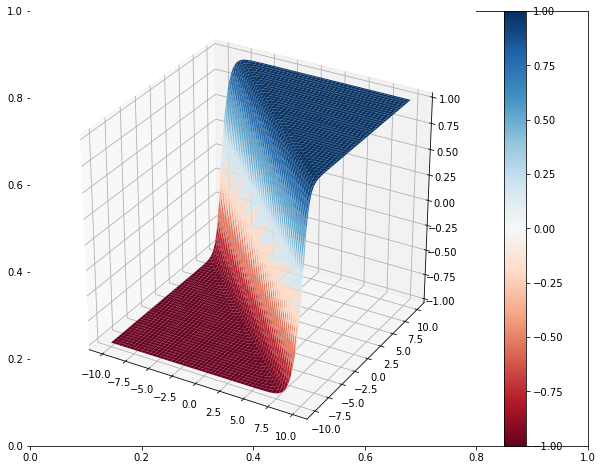

In [43]:
w1 = tf.Variable(tf.linspace(-10.0, 10.0, 100))
w2 = tf.Variable(tf.linspace(-10.0, 10.0, 100))

W1, W2 = tf.meshgrid(w1, w2)

z = tf.nn.tanh(W1 + W2)
dz = tf.gradients(z, [w1, w2])[0]

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    w1_, w2_, z_, dz_ = sess.run([W1, W2,  z, dz])
    fig, _ = plt.subplots(figsize = (10, 8))
    ax = fig.gca(projection='3d')
    im = ax.plot_surface(w1_, w2_, z_, cmap = cm.RdBu)
    fig.colorbar(im)

In [45]:
df = pd.read_csv("/data/kaggle/data_combined_cleaned.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 80 columns):
Id               2919 non-null int64
MSSubClass       2919 non-null int64
MSZoning         2919 non-null object
LotFrontage      2919 non-null float64
LotArea          2919 non-null int64
Street           2919 non-null object
Alley            2919 non-null object
LotShape         2919 non-null object
LandContour      2919 non-null object
LotConfig        2919 non-null object
LandSlope        2919 non-null object
Neighborhood     2919 non-null object
Condition1       2919 non-null object
Condition2       2919 non-null object
BldgType         2919 non-null object
HouseStyle       2919 non-null object
OverallQual      2919 non-null int64
OverallCond      2919 non-null int64
YearBuilt        2919 non-null int64
YearRemodAdd     2919 non-null int64
RoofStyle        2919 non-null object
RoofMatl         2919 non-null object
Exterior1st      2919 non-null object
Exterior2nd      2919 non

In [119]:
df = df[~np.isnan(df.SalesPrice)]
y = np.log(df.SalesPrice.values)
X = df.drop(columns=["SalesPrice", "Id"])
X_dummy = pd.get_dummies(X)
X_dummy.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,2003,2003,196.0,706.0,0.0,...,0,0,0,1,0,0,0,0,1,0
1,20,80.0,9600,6,8,1976,1976,0.0,978.0,0.0,...,0,0,0,1,0,0,0,0,1,0
2,60,68.0,11250,7,5,2001,2002,162.0,486.0,0.0,...,0,0,0,1,0,0,0,0,1,0
3,70,60.0,9550,7,5,1915,1970,0.0,216.0,0.0,...,0,0,0,1,1,0,0,0,0,0
4,60,84.0,14260,8,5,2000,2000,350.0,655.0,0.0,...,0,0,0,1,0,0,0,0,1,0


In [112]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X_dummy, y
                                    , test_size = 0.3, random_state = 1)

scaler = preprocessing.StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [113]:
n_x = X_train.shape[1]
n_x

301

In [114]:
from time import time

y_pred Tensor("add:0", shape=(?, 1), dtype=float32)
b''
0 146.98676
500 0.39182082
1000 0.01551494
1500 0.010141417
2000 0.008740743
2500 0.008189585
3000 0.007933827
3500 0.0077988277
4000 0.0077195307
4500 0.0076685427
4999 0.0076332428
RMSE:  0.20914427016594442


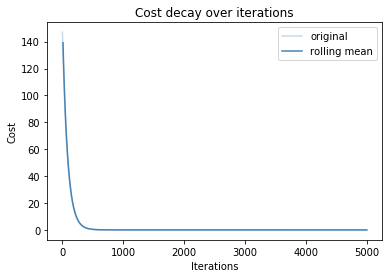

In [115]:
def regression_model(X_train, X_test, y_train, y_test):
    
    max_iters = 5000
    
    n_x = X_train.shape[1]

    tf.reset_default_graph()

    X = tf.placeholder(tf.float32, shape=[None, n_x], name="X")
    y = tf.placeholder(tf.float32, shape=[None, 1], name = "y")

    W = tf.Variable(tf.truncated_normal([n_x, 1], stddev=0.1, seed = 1), name = "W")
    b = tf.Variable(0.0, dtype=tf.float32, name="b")
    y_pred = tf.matmul(X, W) + b
    print("y_pred", y_pred)

    mse = tf.reduce_mean(tf.square(y - y_pred))

    tf.summary.scalar("cost", mse)
    tf.summary.tensor_summary("W", W)

    optimizer = tf.train.GradientDescentOptimizer(learning_rate = 0.003).minimize(mse)

    summary = tf.summary.merge_all()

    with tf.Session() as session:
        print(session.sess_str)
        scores = {}
        tf.global_variables_initializer().run()
        writer = tf.summary.FileWriter("/tmp/tf/logs/%d" %time() , session.graph)

        epochs, costs = 200, []
        for i in range(max_iters):
            _, mse_,summary_ = session.run([optimizer, mse, summary]
                                           , feed_dict = {X: X_train, y: y_train.reshape(-1, 1)})
            scores[i] = mse_
            writer.add_summary(summary_, i)
            if i % (max_iters // 10) == 0 or i == max_iters - 1:
                print(i, mse_)
                
        #print("Intercept and coeff:\n", session.run([b, W]))
        
        y_test_pred = session.run(y_pred, feed_dict={X: X_test})
        print("RMSE: ", metrics.mean_squared_error(y_test, y_test_pred) ** 0.5)

        plot_scores(scores)
        writer.close()
        
regression_model(X_train, X_test, y_train, y_test)

0 135.10739
500 23.809566
1000 3.006304
1500 1.3539572
2000 0.9007892
2500 0.6971234
3000 0.579939
3500 0.50135815
4000 0.44347522
4500 0.39825952
4999 0.36161226
RMSE:  1.2633572919363554


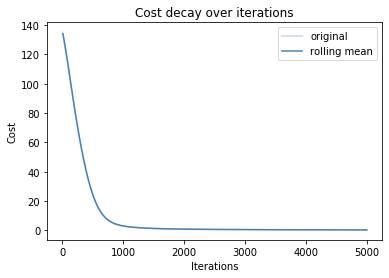

In [116]:
def regression_model(X_train, X_test, y_train, y_test):
    
    max_iters = 5000
    
    n_x = X_train.shape[1]

    tf.reset_default_graph()

    X = tf.placeholder(tf.float32, shape=[None, n_x], name="X")
    y = tf.placeholder(tf.float32, shape=[None, 1], name = "y")
    A1 = tf.layers.dense(X, 100, activation="elu")
    A2 = tf.layers.dropout(A1, rate=0.6)
    y_pred = tf.layers.dense(A2, 1, activation="elu")
    mse = tf.reduce_mean(tf.square(y - y_pred))
    tf.summary.scalar("cost", mse)
    tf.summary.tensor_summary("W", W)

    
    optimizer = tf.train.GradientDescentOptimizer(learning_rate = 0.0001, ).minimize(mse)

    summary = tf.summary.merge_all()

    with tf.Session() as session:
        scores = {}
        tf.global_variables_initializer().run()
        writer = tf.summary.FileWriter("/tmp/tf/logs/%d" %time() , session.graph)

        epochs, costs = 200, []
        for i in range(max_iters):
            _, mse_,summary_ = session.run([optimizer, mse, summary]
                                , feed_dict = {X: X_train, y: y_train.reshape(-1, 1)})
            scores[i] = mse_
            writer.add_summary(summary_, i)
            if i % (max_iters // 10) == 0 or i == max_iters - 1:
                print(i, mse_)
                
        y_test_pred = session.run(y_pred, feed_dict={X: X_test})
        print("RMSE: ", metrics.mean_squared_error(y_test, y_test_pred) ** 0.5)

        plot_scores(scores)
        writer.close()
        
regression_model(X_train, X_test, y_train, y_test)

In [133]:
cat_columns = [k for k in X.dtypes.index if (X.dtypes[k]) == 'object']
cat_columns

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [132]:
num_columns = [k  for k in X.dtypes.index if (X.dtypes[k]) != 'object']
num_columns

['MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold']